In [1]:
from google.colab import files
uploaded = files.upload()


Saving online_retail_II.csv to online_retail_II.csv


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('online_retail_II.csv')

In [4]:
# Drop rows with missing values in 'Customer ID' and 'Description'
df = df.dropna(subset=['Customer ID', 'Description'])

# Create a new feature for Total Price
df['TotalPrice'] = df['Quantity'] * df['Price']

# Convert Invoice Date to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract Month and Day of Week from Invoice Date
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

# Filter out rows with non-positive Quantity and Price
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]


<ipython-input-4-ec495946dd0c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['Price']


In [5]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df[['Quantity', 'Price', 'Month', 'DayOfWeek']]
y = df['TotalPrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae_rf = mean_absolute_error(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error for Random Forest: {mae_rf}')

Mean Squared Error: 25.19761206307045
R^2 Score: 0.9944423061315207
Mean Absolute Error for Random Forest: 0.0992367373224734


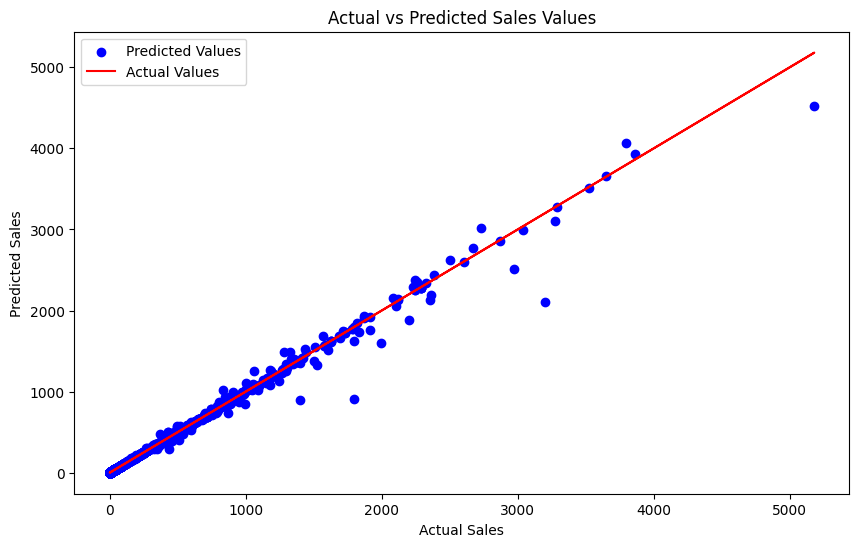

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Values')
plt.plot(y_test, y_test, color='red', label='Actual Values')
plt.title('Actual vs Predicted Sales Values')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()
